In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/traj.csv')

# 将coordinates列转换为经度和纬度两列
df[['longitude', 'latitude']] = pd.DataFrame(df['coordinates'].apply(lambda x: eval(x)).tolist(), index=df.index)

In [3]:
# 根据traj_id分组，提取出不同的轨迹
traj_list = []
for traj_id, group in df.groupby('traj_id'):
    traj_coords = [(row['longitude'], row['latitude']) for _, row in group.iterrows()]
    traj_list.append(traj_coords)

In [4]:
len(traj_list)

17600

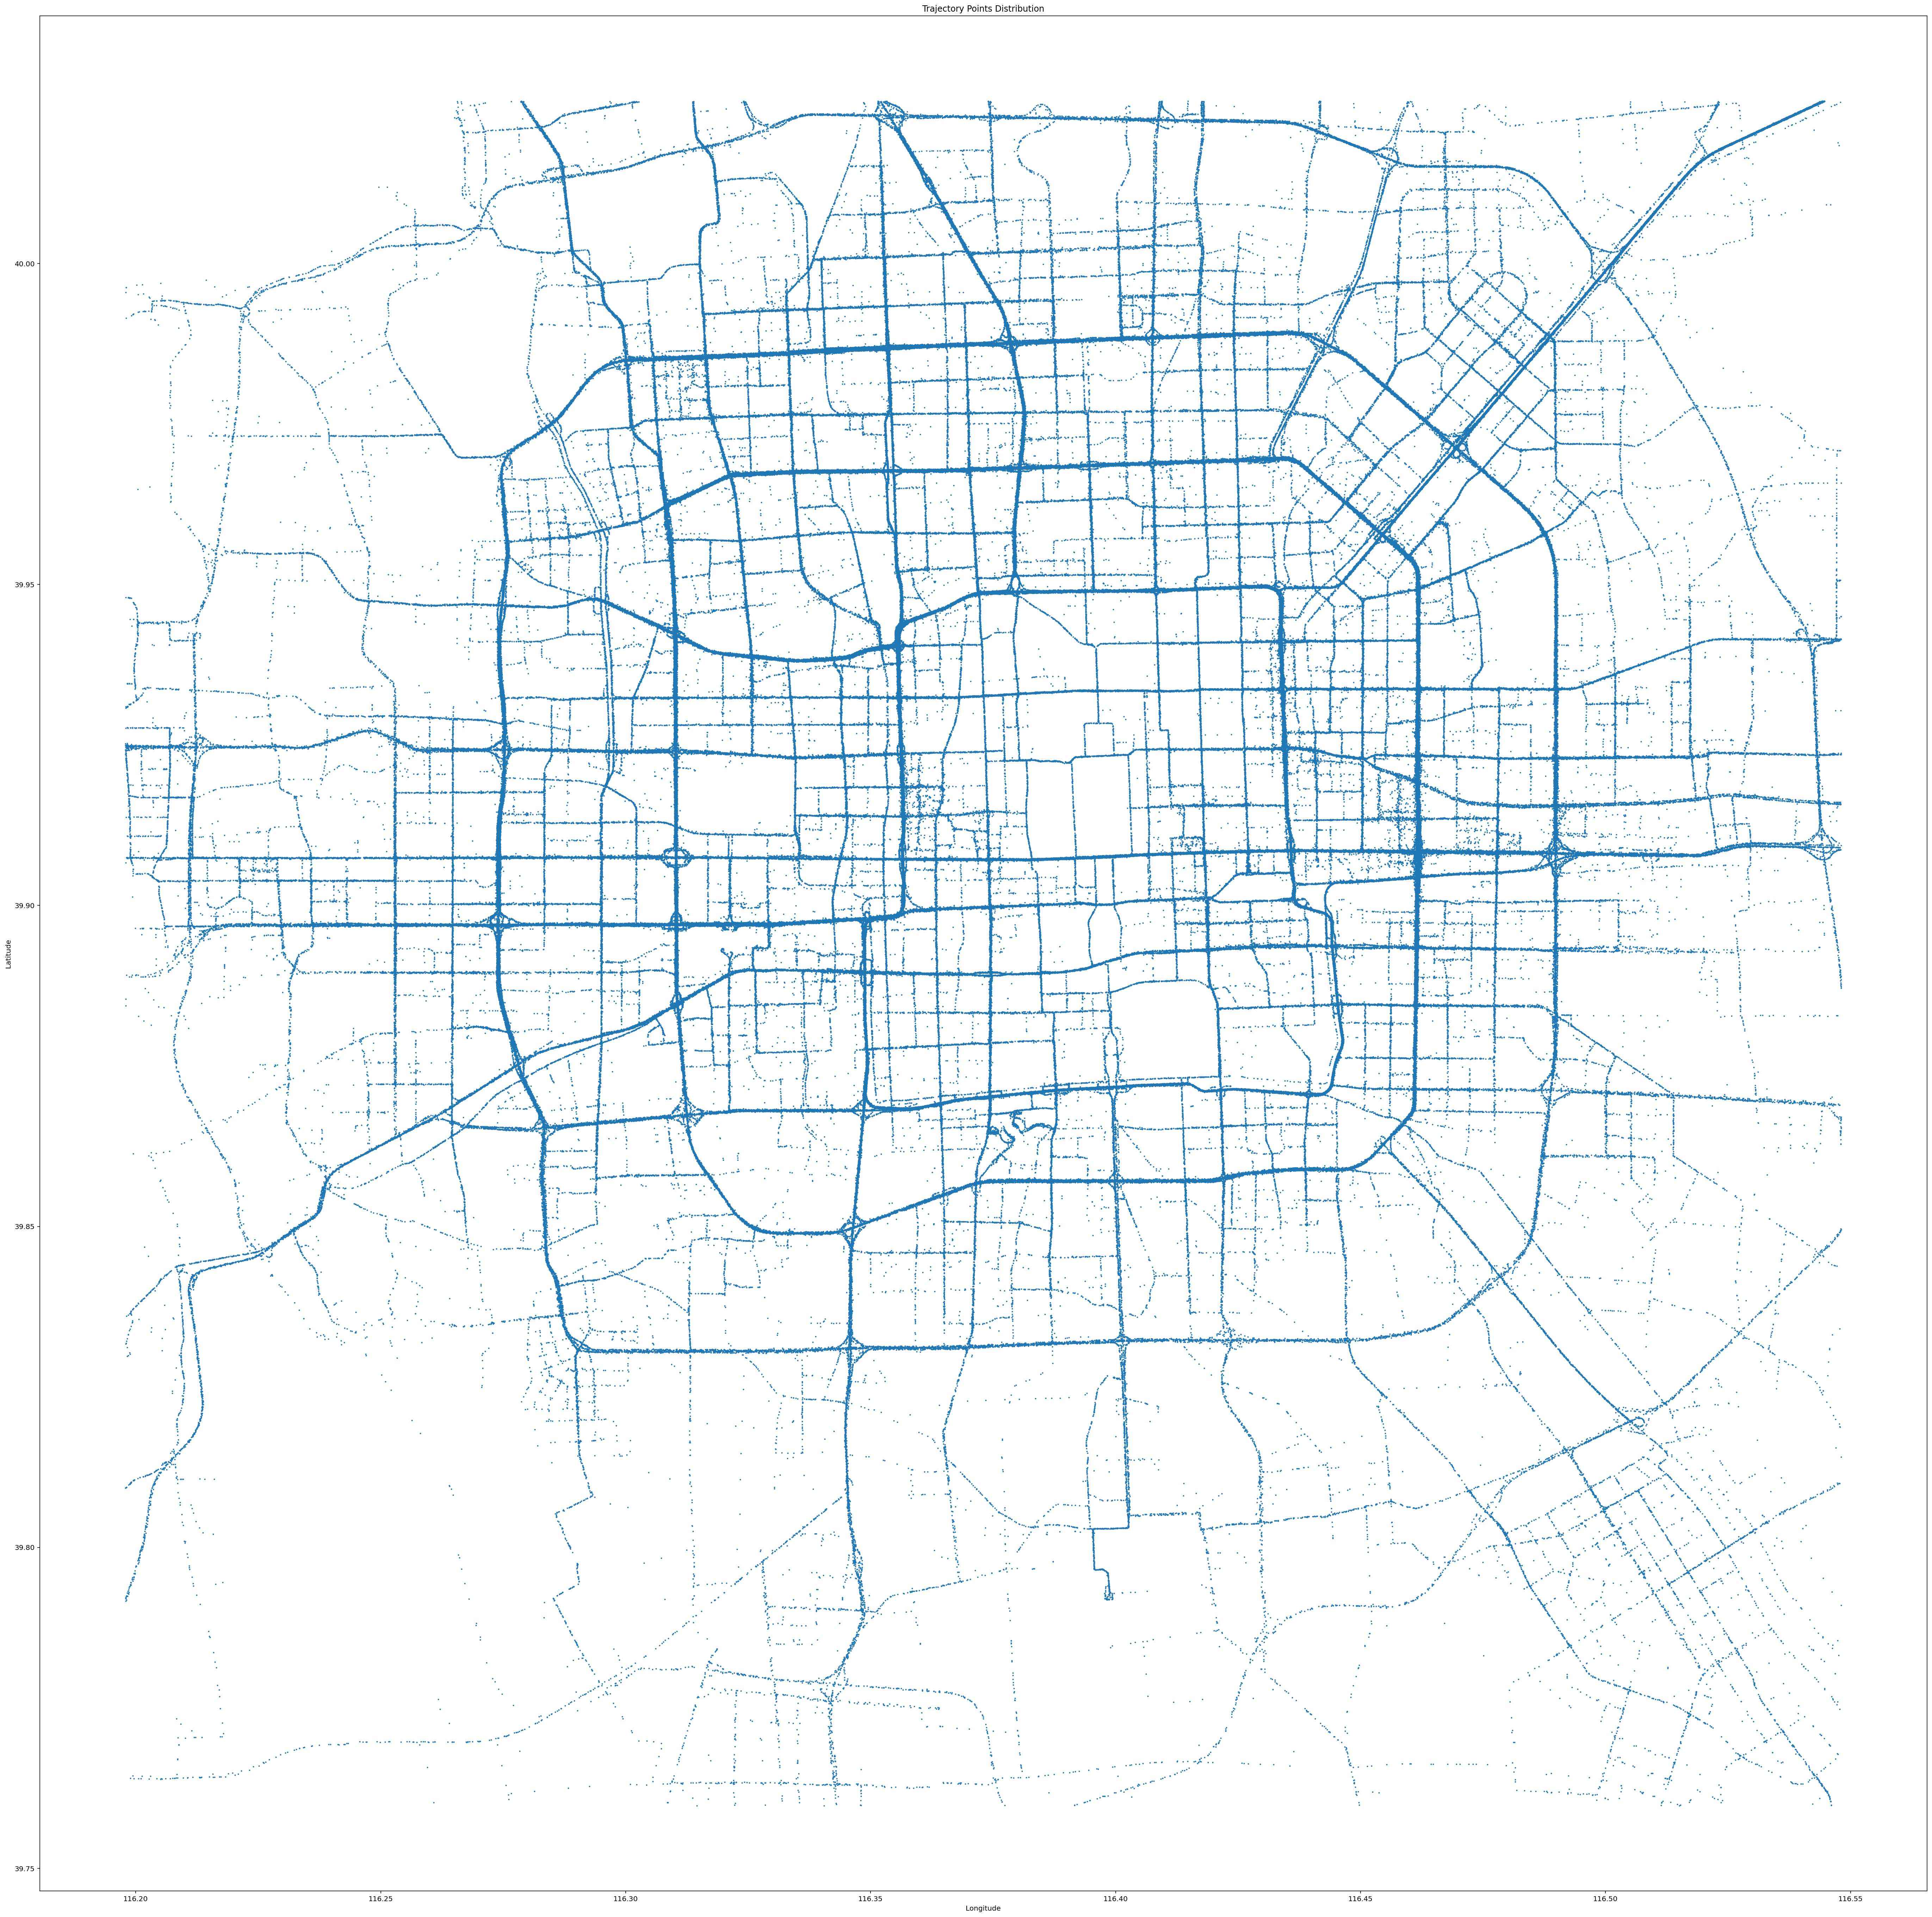

In [5]:
# 创建一个高清图（～17 MiB）
# fig, ax = plt.subplots(figsize=(48, 48), dpi=576)

# 创建一张普清图（～3 MiB）
fig, ax = plt.subplots(figsize=(48, 48), dpi=144)

# 绘制散点图
ax.scatter(df['longitude'], df['latitude'], s=1)

# 设置x、y轴标签和标题
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Trajectory Points Distribution')

# 显示图形
plt.show()

In [6]:
import numpy as np
from fastdtw import fastdtw

# 假设有两条轨迹
trajectory1 = [(0, 0), (0, 2), (0, 4), (2, 6), (4, 7.5)]
trajectory2 = [(1, 2), (2.5, 5), (3.3, 6.7), (3.9, 8)]

# 将轨迹转换为numpy数组，方便处理
traj1_array = np.array(trajectory1)
traj2_array = np.array(trajectory2)

# 计算DTW距离
distance, path = fastdtw(traj1_array, traj2_array)

# 输出距离值
print(f"DTW Distance: {distance}")

# 如果需要，还可以获取对齐路径（path）
# print("Alignment Path:", path)

DTW Distance: 10.1


In [7]:
trajectory1 = trajectory1[::-1]
trajectory1

[(5, 6), (3, 4), (1, 2)]

In [18]:
import numpy as np

def directed_dtw(x, y):
    x_len = len(x)
    y_len = len(y)
    
    # 初始化距离矩阵，并设置边界条件
    dtw_matrix = np.zeros((x_len + 1, y_len + 1))
    dtw_matrix[0, :] = np.inf
    dtw_matrix[:, 0] = np.inf
    dtw_matrix[0, 0] = 0
    
    # 定义距离计算函数，这里假设使用欧氏距离作为点之间的成本
    def distance(a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    for i in range(1, x_len + 1):
        for j in range(max(1, i), y_len + 1):
            # 根据方向性约束，只允许从上和左上方两个方向移动
            if j >= i:
                cost = distance(x[i-1], y[j-1])
                dtw_matrix[i][j] = cost + min(dtw_matrix[i-1][j], dtw_matrix[i][j-1])

    # DTW距离就是右下角的值
    ddtw_distance = dtw_matrix[x_len][y_len]

    return ddtw_distance

# 示例数据
trajectory1 = [(0, 0), (0, 2), (0, 4), (2, 6), (4, 7.5)]
trajectory2 = [(1, 2), (2.5, 5), (3.3, 6.7), (3.9, 8)]

# 将轨迹转换为numpy数组
traj1_array = np.array(trajectory1)
traj2_array = np.array(trajectory2)

ddtw_dist = directed_dtw(traj1_array, traj2_array)
print("DDTW Distance: ", ddtw_dist)

DDTW Distance:  0.0


In [37]:
def directed_dtw(x, y):
    """
    计算两条有方向的轨迹 x 和 y 之间的 directed DTW 距离。
    x 和 y 都是由点组成的 list，每个点都是形如 [x, y] 的二维坐标。
    """
    n = len(x)
    m = len(y)
    
    # 初始化距离矩阵
    D = np.zeros((n+1, m+1))
    for i in range(1, n+1):
        D[i, 0] = np.inf
    for j in range(1, m+1):
        D[0, j] = np.inf
    
    # 计算距离矩阵
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = np.sqrt((x[i-1][0]-y[j-1][0])**2 + (x[i-1][1]-y[j-1][1])**2)
            D[i, j] = cost + min(D[i-1, j], D[i, j-1], D[i-1, j-1])
    
    return D[n, m]

# 示例数据
trajectory1 = [(0, 0), (0, 2), (0, 4), (2, 6), (4, 7.5)]
trajectory2 = [(1, 2), (2.5, 5), (3.3, 6.7), (3.9, 8)]

# 将轨迹转换为numpy数组
traj1_array = np.array(trajectory1)
traj2_array = np.array(trajectory2)

ddtw_dist = directed_dtw(traj1_array, traj2_array)
print("DDTW Distance: ", ddtw_dist)

DDTW Distance:  24.718420041532475


In [15]:
# 示例数据
trajs = [
    [(0, 0), (0, 0.8), (0, 1.7), (0, 2), (0, 3), (0, 4), (1.8, 5.4), (2, 6), (3, 6.7), (4, 7.5)],
    [(1, 2), (2.5, 5), (3.3, 6.7), (3.9, 8)],
    [(4, 1), (5, 2), (6, 3), (8, 4)],
    [(4, 1), (4.5, 1.1), (5.3, 1.6), (9.2, 4.4)],
    [(-1, 1.5), (-3, 2.7), (-4.4, 6)],
    [(-2, 0.9), (-2.8, 1.2), (-4.5, 1.9), (-8, 3)],
    [(0, 0), (-2, 0), (-3, 0), (-4.4, 0), (-4.5, 0), (-4.6, 0), (-4.8, 0), (-5, 0), (-6, -3), (-7, -5)],
]

In [16]:
from sklearn.cluster import DBSCAN
from fastdtw import fastdtw
import numpy as np

def directed_dtw(traj1, traj2):
    n = len(traj1)
    m = len(traj2)
    
    # 初始化距离矩阵
    D = np.zeros((n+1, m+1))
    for i in range(1, n+1):
        D[i, 0] = np.inf
    for j in range(1, m+1):
        D[0, j] = np.inf
    
    # 计算距离矩阵
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = np.sqrt((traj1[i-1][0]-traj2[j-1][0])**2 + (traj1[i-1][1]-traj2[j-1][1])**2)
            D[i, j] = cost + min(D[i-1, j], D[i, j-1], D[i-1, j-1])
    
    return D[n, m]

# 自定义距离计算函数
def calculate_dis(traj1, traj2):
    traj1_array = np.array(traj1)
    traj2_array = np.array(traj2)
    # distance = directed_dtw(traj1_array, traj2_array)
    distance, path = fastdtw(traj1_array, traj2_array)
    return distance

# 轨迹数据
# trajs = traj_list

# 将轨迹数据转换为距离矩阵
dist_matrix = np.zeros((len(trajs), len(trajs)))
for i in range(len(trajs)):
    for j in range(i+1, len(trajs)):
        dist_matrix[i][j] = calculate_dis(trajs[i], trajs[j])
        dist_matrix[j][i] = dist_matrix[i][j]

# 使用DBSCAN进行聚类
dbscan = DBSCAN(metric='precomputed', eps=16, min_samples=1)
dbscan.fit(dist_matrix)

# 输出聚类结果
labels = dbscan.labels_
print(labels)

[0 0 1 1 2 2 3]


In [17]:
# 使用unique函数获取不同的类（标签）
unique_labels = np.unique(labels)

# 打印不同的类的数量
num_clusters = len(unique_labels)
print(f"聚类数量：{num_clusters}")

# 打印每个类的样本数
for label in unique_labels:
    num_samples = np.sum(labels == label)
    print(f"类别 {label} 的样本数：{num_samples}")

聚类数量：4
类别 0 的样本数：2
类别 1 的样本数：2
类别 2 的样本数：2
类别 3 的样本数：1


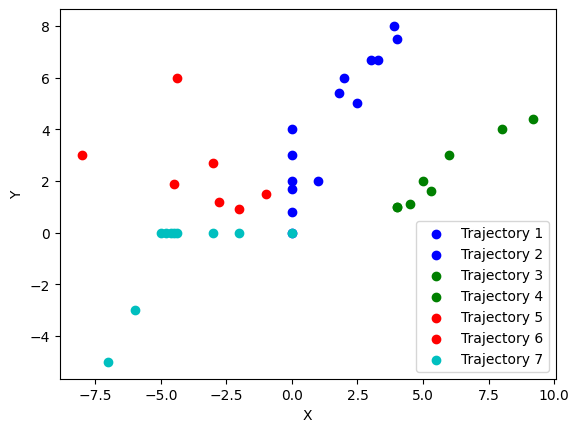

In [18]:
# 画图
import matplotlib.pyplot as plt

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure()

for i, traj in enumerate(trajs):
    x = [point[0] for point in traj]
    y = [point[1] for point in traj]
    plt.scatter(x, y, c=colors[labels[i]], label=f'Trajectory {i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
# 真实数据
from sklearn.cluster import DBSCAN
from fastdtw import fastdtw
import numpy as np

def directed_dtw(traj1, traj2):
    n = len(traj1)
    m = len(traj2)
    
    # 初始化距离矩阵
    D = np.zeros((n+1, m+1))
    for i in range(1, n+1):
        D[i, 0] = np.inf
    for j in range(1, m+1):
        D[0, j] = np.inf
    
    # 计算距离矩阵
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = np.sqrt((traj1[i-1][0]-traj2[j-1][0])**2 + (traj1[i-1][1]-traj2[j-1][1])**2)
            D[i, j] = cost + min(D[i-1, j], D[i, j-1], D[i-1, j-1])
    
    return D[n, m]

# 自定义距离计算函数
def calculate_dis(traj1, traj2):
    traj1_array = np.array(traj1)
    traj2_array = np.array(traj2)
    # distance = directed_dtw(traj1_array, traj2_array)
    distance, path = fastdtw(traj1_array, traj2_array)
    return distance

# 轨迹数据
trajs = traj_list

# 将轨迹数据转换为距离矩阵
dist_matrix = np.zeros((len(trajs), len(trajs)))
for i in range(len(trajs)):
    for j in range(i+1, len(trajs)):
        dist_matrix[i][j] = calculate_dis(trajs[i], trajs[j])
        dist_matrix[j][i] = dist_matrix[i][j]

# 使用DBSCAN进行聚类
dbscan = DBSCAN(metric='precomputed', eps=16, min_samples=1)
dbscan.fit(dist_matrix)

# 输出聚类结果
labels = dbscan.labels_
print(labels)